**Q1. To predict if it will rain tomorrow in XYZ country using suitable ML approach.**

Install and import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Download dataset and import it using appropriate libraries

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving AI-weather assignment.csv to AI-weather assignment.csv


In [ ]:
# Read the uploaded file into a DataFrame
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['AI-weather assignment.csv']))

#print the DataFrame
print(df)




              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

Perform basic descriptive analytics on the data

In [ ]:
# Print data shape
print(df.shape)


(145460, 23)


In [ ]:
# Print data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#print first few rows
print(df.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
# Print the column headers as a list
print(df.columns.tolist())


['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [ ]:
# Get summary statistics
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [ ]:
# Numerical feature count
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# Discrete feature count
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete feature Count 2
['Cloud9am', 'Cloud3pm']


In [ ]:
# Continuous feature count
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)


Continuous feature Count 14
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# Categorical feature count
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))
print(categorical_feature)

Categorical feature Count 7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Analyze the target variable (RainTomorrow)
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
print(rain_tomorrow_counts)


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [ ]:
# Analyze correlations between features
correlation_matrix = df.corr()
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

<ipython-input-108-f80b98657cb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Visualize data for patterns and identify critical features impacting the decision

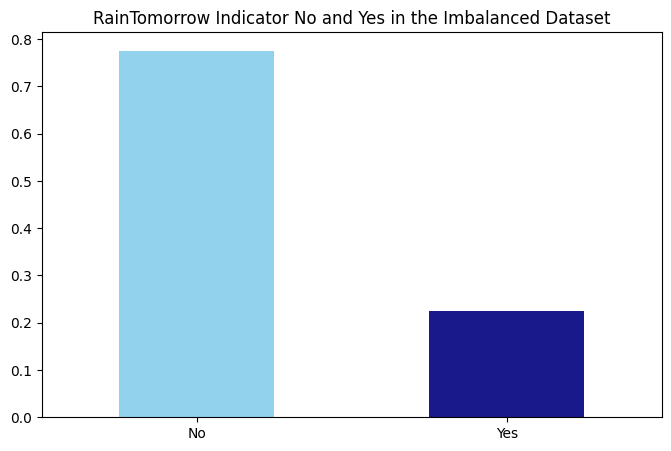

In [ ]:
# Check data imbalance
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
plt.show()

<ipython-input-110-cb0a88849354>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


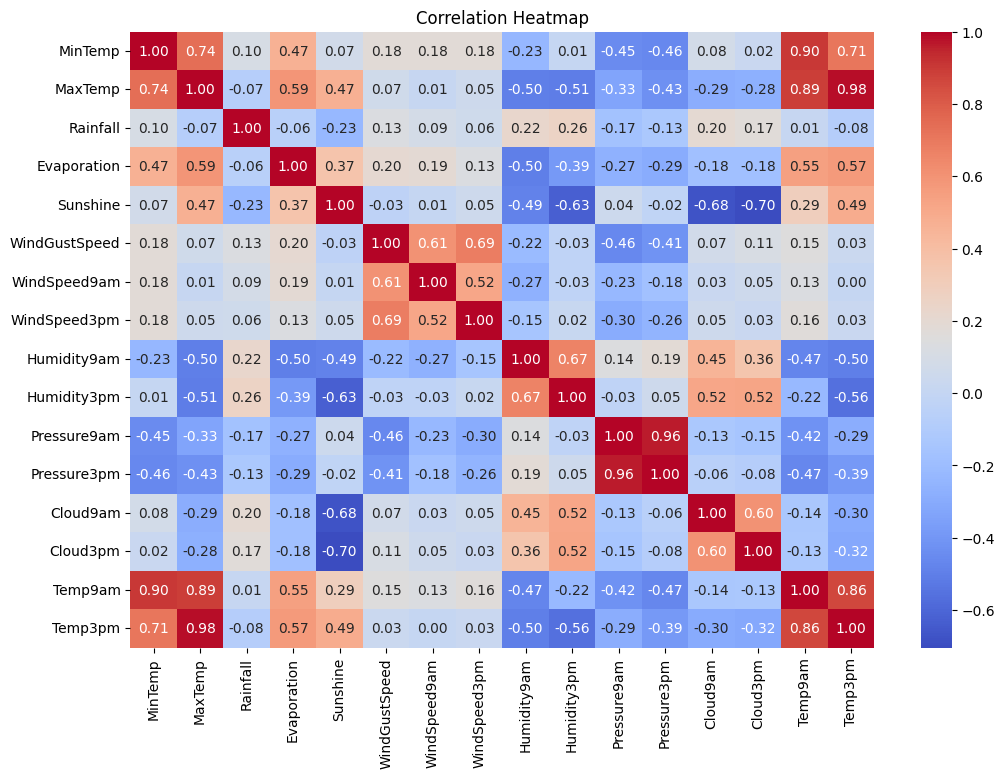

In [ ]:
# Correlation heatmap to see the relationships between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


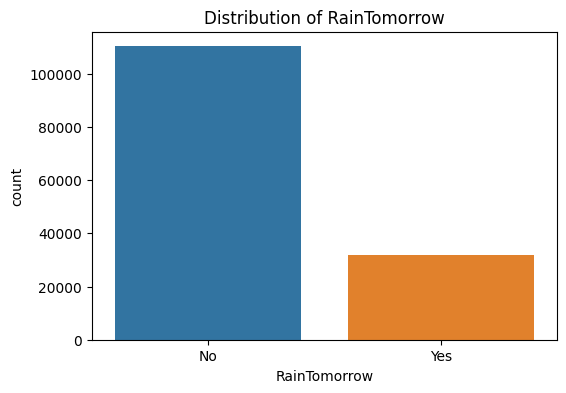

In [ ]:
# Countplot to see the distribution of the target variable 'RainTomorrow'
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

In [ ]:
# Convert the object type in binary (Yes/NO == 1/0)
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

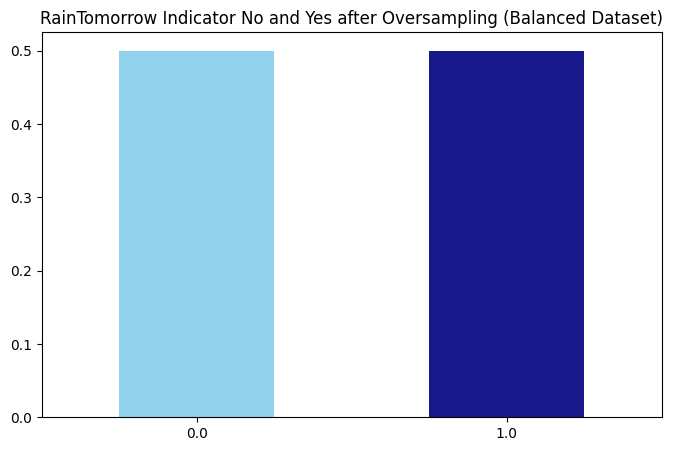

In [ ]:
# Handaling class imbalance
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

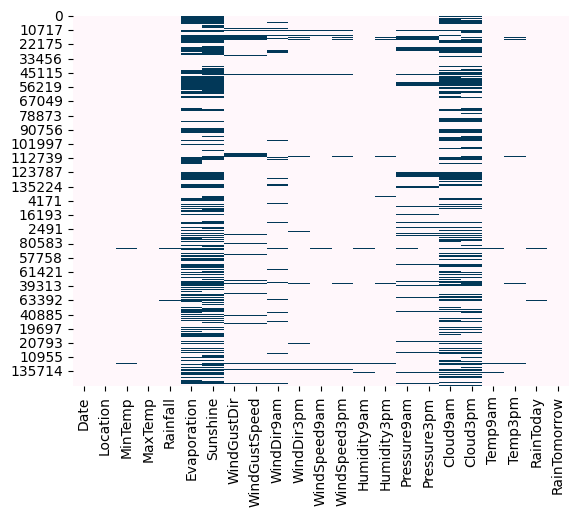

In [ ]:
# Missing Data Pattern in Training Data
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
# Find Categorical Features
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Prepare data for training - data cleaning, data normalization, data encoding, train/test split, etc.

In [ ]:
# Data Encoding (Convert Categorical Features to Numerical)
label_encoder = LabelEncoder()
df['Date'] = label_encoder.fit_transform(df['Date'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])


In [ ]:
# Handle Missing Values (Fill with Mean)
df.fillna(df.mean(), inplace=True)

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
# Data Normalization
scaler = StandardScaler()
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                                                                                               'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                                                                               'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train data using Choice of Classifier : RandomForestClassifier

In [ ]:
# Train the data using Random Forest Classifier
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

Evaluate and improve model performance

In [ ]:
# Evaluate the Model's Performance

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Classifier Accuracy:', accuracy_rf)

# You can also print the classification report and confusion matrix for further evaluation
print('Random Forest Classifier Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Classifier Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8421902928640176
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22012
           1       0.75      0.50      0.60      6420
           2       0.73      0.48      0.58       660

    accuracy                           0.84     29092
   macro avg       0.78      0.64      0.69     29092
weighted avg       0.83      0.84      0.83     29092

Random Forest Classifier Confusion Matrix:
[[20964  1013    35]
 [ 3119  3221    80]
 [  276    68   316]]


In [ ]:
# Improve Performance
# Ensemble of Random Forests
num_estimators = 10  # We can increase this number for more diversity in the ensemble
ensemble_models = []

for _ in range(num_estimators):
    # Create Random Forest Classifier with optimized parameters
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

    # Fit the model on different random subsets of the training data
    idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    rf_model.fit(X_train.iloc[idx], y_train.iloc[idx])

    # Add the model to the ensemble
    ensemble_models.append(rf_model)


In [ ]:
# Make predictions with the ensemble and perform voting
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return np.round(np.mean(predictions, axis=0))

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble_predict(ensemble_models, X_test)


In [ ]:
# Evaluate the performance
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.832565653787983


In [ ]:
# Cross-validation to get a better estimate of the model's performance
cv_scores = cross_val_score(ensemble_models[0], X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.84407493 0.83410673 0.83788777 0.83805268 0.83749409]
Mean CV Score: 0.8383232409278245


In [ ]:
# Best hyperparameters
best_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'bootstrap': True
}

In [ ]:
# Create a Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [ ]:
# Make predictions on the test set using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model's performance
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", best_accuracy)

Best Accuracy: 0.8414340712223292


Write inference based on the results

In [ ]:
# Get feature importances from the best_rf_model
feature_importances = best_rf_model.feature_importances_

# Get the column names (feature names)
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

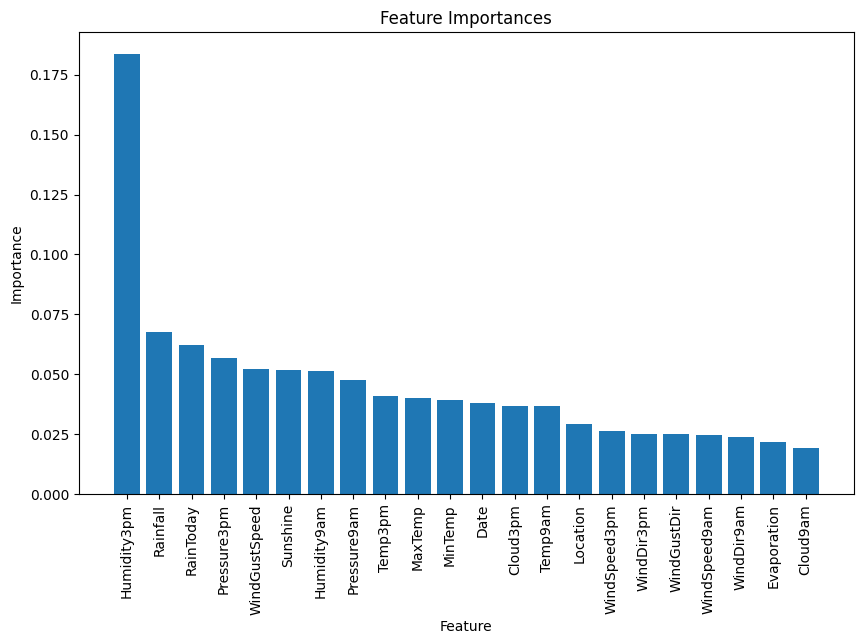

In [ ]:
# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


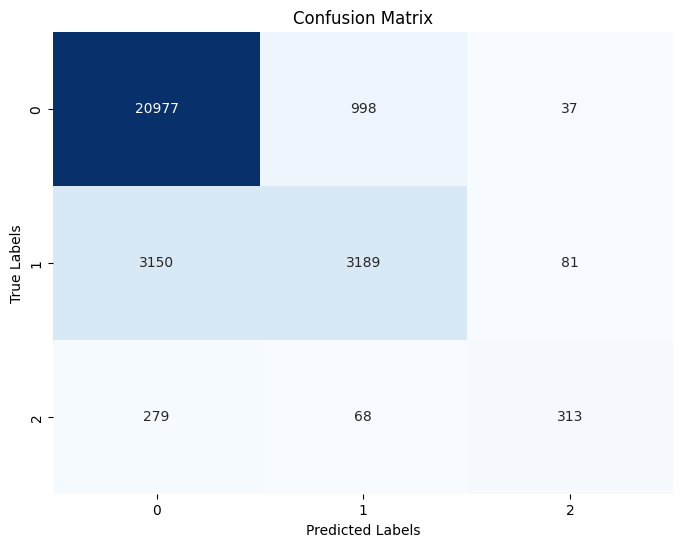

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()